## Eigenvalues

In this chapter we shift focus away from solving linear systems, and look closer at the effect of matrix multiplication.  We restrict our attention now to square matrices, which define linear transformations from $\mathbb{R}^n$ to $\mathbb{R}^n$.  In this context we will study special values called eigenvalues, and corresponding vectors called eigenvectors, that can be used to analyze the effect of a corresponding matrix.

Given a square $n\times n$ matrix $A$, a scalar $\lambda$ is called an **eigenvalue** of $A$ if there exists some nonzero vector $V$ in $\mathbb{R}^n$ such that $AV=\lambda V$.  The vector $V$ is the **eigenvector** associated with $\lambda$.  The equation states that when an eigenvector of $A$ is multiplied by $A$, the result is simply a multiple of the eigenvector.  In general, there may be multiple eigenvalues associated with a given matrix, and we will label them as $\lambda_1$, $\lambda_2$, etc., to keep an orderly notation.  We will label eigenvectors in a similar way in order to track which eigenvectors are associated with which eigenvalues.  

We will visualize examples in $\mathbb{R}^2$.  

### Example 1:  Matrix representing horizontal stretch

Let's consider first the following matrix.

$$
\begin{equation}
A = \left[ \begin{array}{cc} 2 & 0 \\ 0 & 1 \end{array}\right]
\end{equation}
$$

We saw in [Chapter 3](Planar_Transformations.ipynb) that multiplication by this matrix has the effect of a horizontal stretch.

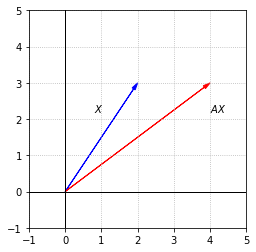

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,3,fc='r',ec='r',**options)

ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-1,6,step = 1))
ax.set_yticks(np.arange(-1,6,step = 1))

ax.text(0.8,2.2,'$X$')
ax.text(4,2.2,'$AX$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

$$
\begin{equation}
X = \left[ \begin{array}{c} 2  \\ 3 \end{array}\right] \hspace{1cm}
AX = \left[ \begin{array}{c} 4  \\ 3 \end{array}\right]
\end{equation}
$$

For this example it is possible to deduce the eigenvalues and eigenvectors since the effect of the matrix is rather simple.  Any vector that does not have its direction changed by this transformation is an eigenvector.  In particular, we notice that any vector along the $x_1$-axis will be scaled by the stretch, but the direction will be unchanged.  Let's choose the unit vector to label as $V_1$

$$
\begin{equation}
V_1 = \left[ \begin{array}{c} 1  \\ 0 \end{array}\right] \hspace{1cm}
\end{equation}
$$

We can calculate and observe that $AV_1 = 2V_1$  This tells us that $\lambda_1 = 2$ is the eigenvalue associated with $V_1$.  It is important to note that given $\lambda_1 = 2$, there is a whole collection of eigenvectors that satisfy the equation $AV = 2V$.  Indeed if $V=kV_1$, where $k$ is any scalar, we have 

$AV = A(kV_1) = k(AV_1) = k(2V_1) = 2(kV_1) = 2V$.

We now consider if any other vectors whose directions are unchanged by the transformation. 
After a bit of thought, we realize that any vector along the $x_2$-axis is entirely unaffected by the matrix multiplication.  Let's label $V_2$ as the unit vector along that axis.

$$
\begin{equation}
V_2 = \left[ \begin{array}{c} 0  \\ 1 \end{array}\right] \hspace{1cm}
\end{equation}
$$

Since $AV_2 = V_2$, it must be that the associated eigenvalue is $\lambda_2 = 1.$  Again we note that there is a whole collection of eigenvectors associated with $\lambda_2$, since any multiple of $V_2$ is also unchanged by the transformation.

### Example 2:  Projection matrix

For the next example, let's consider a matrix which projects vectors orthogonally onto its one-dimensional column space.

$$
\begin{equation}
B = \left[ \begin{array}{cc} 0.2 & -0.4 \\ -0.4 & 0.8 \end{array}\right]
\end{equation}
$$


In [2]:
B = np.array([[0.2, -0.4],[-0.4, 0.8]])
X = np.array([[1],[2]])
Y = np.array([[2],[1]])

print(B@X,'\n')
print(B@Y)


[[-0.6]
 [ 1.2]] 

[[0.]
 [0.]]


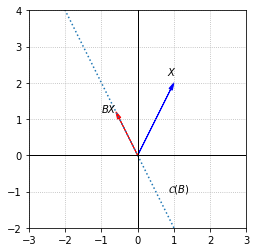

In [4]:
fig, ax = plt.subplots()
x=np.linspace(-6,6,100)

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,1,2,fc='b',ec='b',**options)
ax.arrow(0,0,-0.6,1.2,fc='r',ec='r',**options)
ax.plot(x,-2*x,ls=':')

ax.set_xlim(-3,3)
ax.set_ylim(-2,4)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-3,4,step = 1))
ax.set_yticks(np.arange(-2,5,step = 1))

ax.text(0.8,2.2,'$X$')
ax.text(-1,1.2,'$BX$')
ax.text(0.85,-1,'$\mathcal{C}(B)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

In this example we can again determine the eigenvectors and corresponding eigenvalues by considering the transformation represented by the matrix.  Any vectors in $\mathcal{C}(B)$ will be unchanged by the projection.  Again we will label one such vector as $V_1$.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} -1  \\ 2 \end{array}\right] \hspace{1cm}
\end{equation}
$$

Since $BV_1 = V_1$ the eigenvalue corresponding to $V_1$ is $\lambda_1 = 1$.

The other eigenvalue for this matrix may not be as easy to discover by examining the directions of various choices of $X$ and the corresponding directions of $BX$.  If we closely consider the definition of eigenvalues however, we realize that if there exists any nonzero vector $V$ such that $BV=0$, then that vector must be an eigenvector with zero as the corresponding eigenvalue.  To make the statement in terms of the fundamental subspaces, zero is an eigenvalue of the matrix $B$ if there are any nonzero vectors in $\mathcal{N}(B)$.  

In this example, since $B$ represents an orthogonal projection, $\mathcal{N}(B)$ is the subspace orthogonal to $\mathcal{C}(B)$.  We can label any such vector as $V_2$ 

$$
\begin{equation}
V_2 = \left[ \begin{array}{r} 2  \\ 1 \end{array}\right] \hspace{1cm}
\end{equation}
$$

The eigenvalue corresponding to $V_2$ is $\lambda_2 = 0$.

### Exercises

**Exercise 1:** Determine the eigenvalues and corresponding eigenvectors of the following matrix by considering the transformation that it represents.  Check your answers with a computations.

$(a)$

$$
\begin{equation}
A = \left[ \begin{array}{cc} 1 & 0 \\ 0 & -3 \end{array}\right]
\end{equation}
$$

$(b)$

$$
\begin{equation}
B = \left[ \begin{array}{cc} 1 & 1 \\ 0 & 1 \end{array}\right]
\end{equation}
$$

$(c)$

$$
\begin{equation}
C = \left[ \begin{array}{cc} \cos(\frac{\pi}{2}) & -\sin(\frac{\pi}{2}) \\ \sin(\frac{\pi}{2}) & \cos(\frac{\pi}{2}) \end{array}\right]
\end{equation}
$$

$(d)$

$$
\begin{equation}
D = \left[ \begin{array}{cc} -0.6 & -0.8 \\ -0.8 & 0.6 \end{array}\right]
\end{equation}
$$

**Exercise 2:** Find the eigenvalues and the corresponding eigenvectors of the following matrix $R$ that represents the reflection transformation about the line $ x_1 = x_2 $.


$$
\begin{equation}
R = \left[ \begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right]
\end{equation}
$$

In [ ]:
## Code solution here

**Exercise 3:** Find a matrix that represents a vertical and horizontal stretch by a factor of $2$. Then, find the eigenvalues and the eigenvectors associated with those eigenvalues. (You may have to take a look at the Planar Transformations section  [Planar Transformations](Planar_Transformations.ipynb)).

In [1]:
## Code solution here

**Exercise 4:** Find a matrix that represents reflection about the $x_1-$axis and find its eigenvalues and eigenvectors.

In [3]:
## Code solution here